# Data Mining the Water Table

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [58]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [52]:
x_train = pd.read_csv('https://raw.githubusercontent.com/kayoyin/datasets/master/x_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/kayoyin/datasets/master/y_train.csv')
x_test = pd.read_csv('https://raw.githubusercontent.com/kayoyin/datasets/master/x_test.csv')

In [4]:
print(x_train.shape, y_train.shape, x_test.shape)

(59400, 40) (59400, 2) (14850, 40)


In [38]:
x_train.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


In [6]:
y_train.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [53]:
y_num = y_train.replace(['functional','non functional', 'functional needs repair'], [0,1,2])
data_viz = pd.concat([x_train,y_train['status_group']],axis=1)
labels = pd.get_dummies(y_train)

# Exploratory Data Analysis

In [37]:
print("Number of water tables per status: \n", y_train.sum()[1:])
x_train.isnull().sum()

Number of water tables per status: 
 status_group_functional                 32259
status_group_functional needs repair     4317
status_group_non functional             22824
dtype: int64


id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [41]:
cat_df = pd.DataFrame(columns=["Feature", "Cardinality","% Missings"])

total_cardinality = 0

i=0

for col in x_train.columns:
    if (x_train[col].dtype == np.object):
        cat_df.loc[i,"Feature"] = col
        cat_df.loc[i,"Cardinality"] = len(x_train[col].unique())
        total_cardinality += len(x_train[col].unique())
        pct_of_missing_values = float((len(x_train[col]) - x_train[col].count()) / len(x_train[col]))
        cat_df.loc[i,"% Missings"] = pct_of_missing_values*100
        i+=1

print("Total cardinality of categorical features:",total_cardinality)

cat_df

Total cardinality of categorical features: 66178


,Feature,Cardinality,% Missings
0,date_recorded,356,0
1,funder,1898,6.11953
2,installer,2146,6.1532
3,wpt_name,37400,0
4,basin,9,0
5,subvillage,19288,0.624579
6,region,21,0
7,lga,125,0
8,ward,2092,0
9,public_meeting,3,5.61279


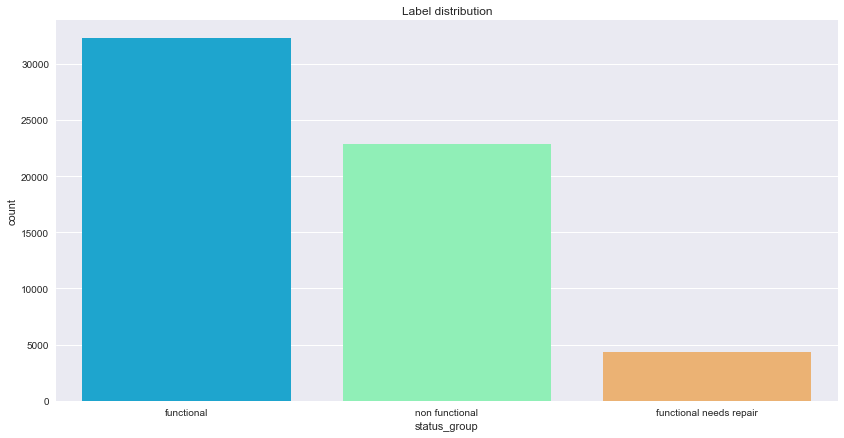

In [59]:
plt.figure(figsize=(14,7))
sns.countplot(x='status_group',data=y_train, palette="rainbow")
plt.title("Label distribution")
plt.show()

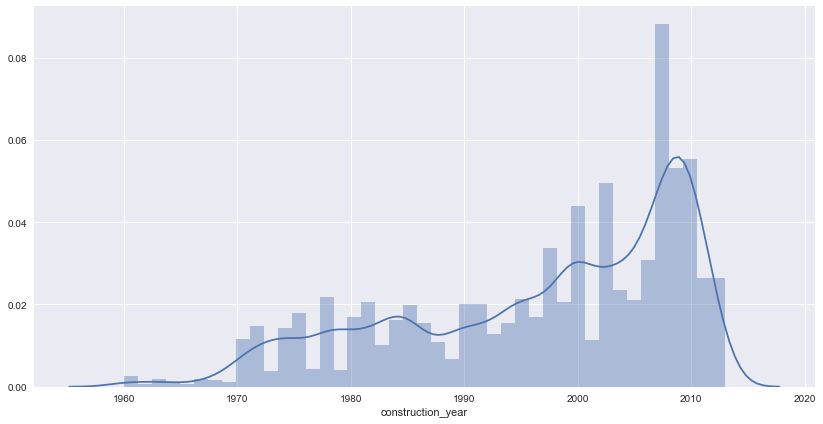

In [60]:
plt.figure(figsize=(14,7))
sns.distplot(data_viz['construction_year'][data_viz['construction_year']>0])
plt.show()

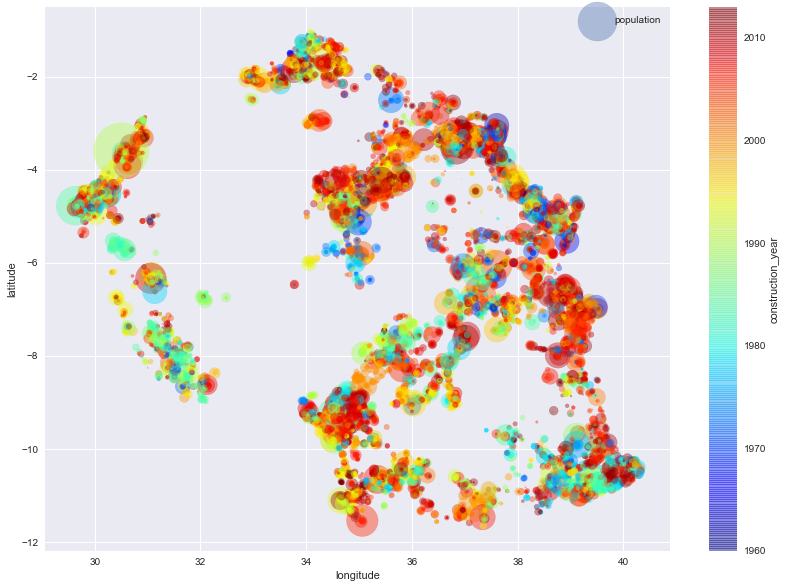

In [64]:
#Water pump geographical distribution with population proportional circles and year of pump color bar

plt.figure(figsize=(14,7))
data_viz[data_viz['longitude']>0][data_viz['latitude']<0][data_viz['construction_year']>0].plot\
    (kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data_viz["population"]/10, label="population", figsize=(14,10),
    c="construction_year", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

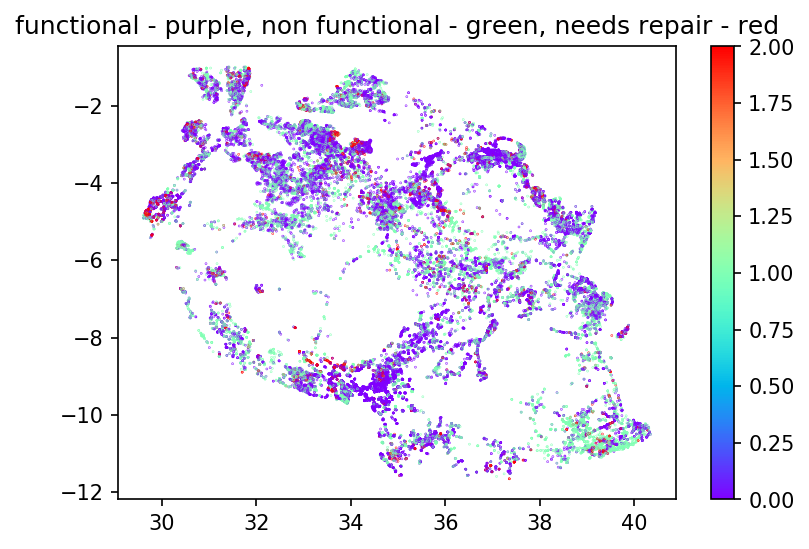

In [17]:
plt.figure(1,dpi=150)
x_geo = x_train.drop(x_train[x_train['longitude'] == 0].index)
y_geo = y_num.drop(x_train[x_train['longitude'] == 0].index)
plt.scatter(x_geo['longitude'], x_geo['latitude'], c = y_geo.iloc[:,1], cmap = 'rainbow', s = 0.05)
plt.title("functional - purple, non functional - green, needs repair - red")
plt.colorbar()
plt.show()

# Cleaning up data

## date_recorded

TODO: 
- add 'date_offset' column with number of days since 2013/12/03
- add 'month' column with month recorded

In [12]:
dates = x_train['date_recorded'].map(lambda x: x.replace('-',''))
print(np.max(dates))

20131203


In [39]:
#x_train['date_offset'] = dates.map(lambda x: int((20131203-x)[0:4])*365 + int((20131203-x)[4:6])*30 + int((20131203-x)[6:8]))